<a href="https://colab.research.google.com/github/vieduy/CS114.K21/blob/master/round_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import các thư viện cần dùng**

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# **Xử lý dữ liệu**
# - Lấy dữ liệu trên .txt sau đó lưu vào file .csv rồi upload lên googlecolab
# - Đọc file .csv
# - Visualize 5 sample đầu tiên


In [57]:
# preparing data
# generate more data 
time_df = pd.read_csv('data_1.csv', names=["size", "time"])
size = time_df['size'].astype(float)

column_names = ['size', 'time']
pr_df = time_df.reindex(columns=column_names)

data = pr_df[['size']].values
labels = pr_df['time'].values
print(pr_df.head(5))

       size     time
0  37837612  4.12166
1  37395246  3.92089
2  36610827  3.21540
3  29555651  2.54506
4  25928216  2.21831


# **Chia tập dữ liệu thành hai phần training set và test set**

In [58]:
# split train-test set
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

# visualize 5 sample của test set
print(X_test[:5])

[[39027499]
 [26767181]
 [36764993]
 [29287305]
 [34362186]]


# **Chọn model Linear Regression cho bài toán và training model**
# - Chọn bằng cách import trong sklearn. Vì đây là bài toán phù hợp với bài toán Linear Regression


In [59]:
# choose model Linearn Regression
lire = LinearRegression()

# training model...
lire.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# **Dùng model để dự đoán test set**

In [60]:
# Predict time
y_pred = lire.predict(X_test)

# print weight and bias
print('weight: ', lire.coef_)
print('bias: ',lire.intercept_)

weight:  [9.27421382e-08]
bias:  -0.138566004225388


# **Mean Square Error và R2 error**

In [61]:
# Print test error
print(mean_squared_error(y_test, y_pred))
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

0.0029772611563832685
Mean squared error: 0.00
Coefficient of determination: 0.99


# **Visualize dữ liệu**

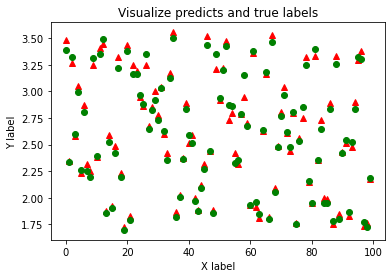

In [20]:
# Visualize pred vs true-labels
plt.plot(np.arange(0, 100), y_pred[:100], 'r^', np.arange(0, 100), y_test[:100], 'go')
plt.title('Visualize predicts and true labels')
plt.xlabel('X label')
plt.ylabel('Y label')
plt.show()

# Sau khi chạy model 1 var với dữ liệu mới(data_1.csv) thì ta thấy MSE tăng lên 19 lần sau với dữ liệu cũ(data.csv) (Từ 0.00015229169816456062 -> 0.0029772611563832685)

# Cho nên model dự đoán trên dữ liệu mới đã tệ hơn. Lý do chính là dữ liệu mới nếu biểu diễn size và time ở data mới thì nó không còn là một đường thẳng. Cho nên nếu dùng 1 features size thì không thể dự đoán chính xác đúng time.
# Cho nên ta cần phải xây dựng model mới bằng cách tăng thêm số features.
# Ta sẽ tăng thêm 2 features size**2 và size.log(size)

In [40]:
time_df = pd.read_csv('data_1.csv', names=["size", "time"])
size = time_df['size'].astype(float)

size_n2 = pow(size, 2)
size_log = size * np.log2(size)

time_df['size_n2'] = size_n2
time_df['size_log'] = size_log
column_names = ['size', 'size_n2', 'size_log', 'time']
pr_df = time_df.reindex(columns=column_names)

data = pr_df[['size', 'size_n2', 'size_log']].values
labels = pr_df['time'].values
print(pr_df.head(5))

       size       size_n2      size_log     time
0  37837612  1.431685e+15  9.524982e+08  4.12166
1  37395246  1.398404e+15  9.407280e+08  3.92089
2  36610827  1.340353e+15  9.198751e+08  3.21540
3  29555651  8.735365e+14  7.334805e+08  2.54506
4  25928216  6.722724e+14  6.385606e+08  2.21831


In [56]:
# split train-test set
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)
print(X_test[:5])

[[3.90274990e+07 1.52314568e+15 9.84194989e+08]
 [2.67671810e+07 7.16481979e+14 6.60452403e+08]
 [3.67649930e+07 1.35166471e+15 9.23971531e+08]
 [2.92873050e+07 8.57746234e+14 7.26435639e+08]
 [3.43621860e+07 1.18075983e+15 8.60233908e+08]]


In [53]:
# choose model Linearn Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
# Predict time
y_pred = lr.predict(X_test)
print('weight: ', lr.coef_)
print('bias: ',lr.intercept_)

weight:  [ 6.48629771e-07  6.67355823e-16 -2.26893927e-08]
bias:  -0.5125548242929181


In [55]:
# Print test error
print('Mean squared error:', mean_squared_error(y_test, y_pred))
# The coefficient of determination:
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 0.002978417253932674
Coefficient of determination: 0.99


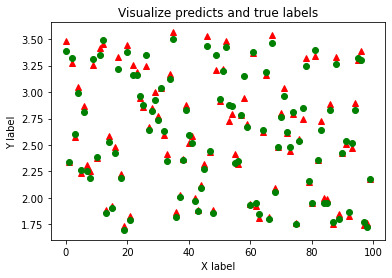

In [50]:
# Visualize pred vs true-labels
plt.plot(np.arange(0, 100), y_pred[:100], 'r^', np.arange(0, 100), y_test[:100], 'go')
plt.title('Visualize predicts and true labels')
plt.xlabel('X label')
plt.ylabel('Y label')
plt.show()